In [1]:
import carla

import json
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from env.CarlaEnv import CarlaEnv
from utils.VideoRecorder import VideoRecorder

In [3]:
with open('./cfg/weather.json', 'r', encoding='utf8') as fff:
    weather_params = json.load(fff)
with open('./cfg/scenario.json', 'r', encoding='utf8') as fff:
    scenario_params = json.load(fff)

In [4]:
fps = 100

In [5]:
carla_env = CarlaEnv(
    weather_params=weather_params,
    scenario_params=scenario_params,
    selected_weather="L1",
    selected_scenario="jaywalk",
    carla_rpc_port=12321,
    carla_tm_port=18935,
    carla_timeout=8,
    perception_type="dvs_frame",
    num_cameras=5,
    rl_image_size=84,
    fov=60,
    max_fps=fps,
    min_fps=fps,
    max_episode_steps=1000,
    frame_skip=1,
)

	 spawn walker: 1, at Location(x=136.859314, y=203.443771, z=0.100000)
	 spawn walker: 2, at Location(x=139.043167, y=203.443939, z=0.100000)
	 spawn walker: 3, at Location(x=145.350494, y=203.444458, z=0.100000)
	 spawn walker: 4, at Location(x=139.916000, y=203.444016, z=0.100000)
	 spawn walker: 5, at Location(x=222.258331, y=203.450714, z=0.100000)
	 spawn walker: 6, at Location(x=194.312286, y=203.448441, z=0.100000)
	 spawn walker: 7, at Location(x=311.354340, y=203.457947, z=0.100000)
	 spawn walker: 8, at Location(x=123.747353, y=203.442703, z=0.100000)
	 spawn walker: 9, at Location(x=310.412323, y=203.457870, z=0.100000)
	 spawn walker: 10, at Location(x=237.302078, y=203.451935, z=0.100000)
	 spawn walker: 11, at Location(x=156.839539, y=190.845383, z=0.100000)
	 spawn walker: 12, at Location(x=170.913635, y=190.846527, z=0.100000)
	 spawn walker: 13, at Location(x=133.418747, y=190.843475, z=0.100000)
	 spawn walker: 14, at Location(x=142.427444, y=190.844208, z=0.100000)
	

In [6]:
throttle = []
steer = []
brake = []
velocity = []

In [7]:
video = VideoRecorder("./video", fps=fps)
video.init(True)

In [8]:
for i in range(400):
    if i<= 200:
        action = [0, 0.7]
    else:
        action = [0, -0.7]
        
    obs, reward, done, info = carla_env.step(action)

    video.record(obs, carla_env.vehicle)

    if False:
        # 可视化↓↓↓↓↓↓
        axs = init_fig()
        axs["rgb"].imshow(sync_mode.rgb_data["img"])
        axs["dvs"].imshow(sync_mode.dvs_data["img"])
        axs["vidar"].imshow(sync_mode.vidar_data["img"])
        axs["hybrid_rgb_dvs"].imshow(
            np.clip(
                sync_mode.rgb_data["img"].astype(np.float32) + sync_mode.dvs_data["img"].astype(np.float32),
                0,
                255
            ).astype(np.uint8)
        )
        axs["hybrid_dvs_vidar"].imshow(sync_mode.dvs_data["img"] + sync_mode.vidar_data["img"])
        axs["big_rgb"].imshow(sync_mode.rgb_data["img"])
        # 可视化↑↑↑↑↑↑ 
        display.clear_output(wait=True)
        plt.pause(0.0001)


    print("frame: {}, rgb-frame: {}, dvs-frame: {}".format(
        carla_env.frame, carla_env.rgb_data["frame"],
        carla_env.dvs_data["frame"],
    ))

    throttle.append(carla_env.vehicle.get_control().throttle)
    steer.append(carla_env.vehicle.get_control().steer)
    brake.append(carla_env.vehicle.get_control().brake)
    velocity.append(carla_env.vehicle.get_velocity().x)


#     carla_env.vehicle.apply_control(
#         carla.VehicleControl(throttle=0.7, brake=0)
#     )


frame: 110, rgb-frame: [111, 111, 112, 112, 112], dvs-frame: [112, 112, 112, 112, 112]
frame: 114, rgb-frame: [115, 115, 115, 115, 115], dvs-frame: [116, 116, 116, 116, 116]
frame: 118, rgb-frame: [119, 119, 119, 119, 119], dvs-frame: [120, 120, 120, 120, 120]
frame: 122, rgb-frame: [121, 121, 121, 121, 121], dvs-frame: [122, 122, 122, 122, 122]
frame: 123, rgb-frame: [122, 122, 122, 122, 122], dvs-frame: [123, 123, 123, 123, 123]
frame: 124, rgb-frame: [123, 123, 123, 123, 123], dvs-frame: [124, 124, 124, 124, 124]
frame: 125, rgb-frame: [124, 124, 124, 124, 124], dvs-frame: [125, 125, 125, 125, 125]
frame: 126, rgb-frame: [125, 125, 125, 125, 125], dvs-frame: [126, 126, 126, 126, 126]
frame: 127, rgb-frame: [126, 126, 126, 126, 126], dvs-frame: [127, 127, 127, 127, 127]
frame: 128, rgb-frame: [127, 127, 127, 127, 127], dvs-frame: [128, 128, 128, 128, 128]
frame: 129, rgb-frame: [128, 128, 128, 128, 128], dvs-frame: [129, 129, 129, 129, 129]
frame: 130, rgb-frame: [129, 129, 129, 129,

frame: 214, rgb-frame: [213, 213, 213, 213, 213], dvs-frame: [214, 214, 214, 214, 214]
frame: 215, rgb-frame: [214, 214, 214, 214, 214], dvs-frame: [215, 215, 215, 215, 215]
frame: 216, rgb-frame: [215, 215, 215, 215, 215], dvs-frame: [216, 216, 216, 216, 216]
frame: 217, rgb-frame: [216, 216, 216, 216, 216], dvs-frame: [217, 217, 217, 217, 217]
frame: 218, rgb-frame: [217, 217, 217, 217, 217], dvs-frame: [218, 218, 218, 218, 218]
frame: 219, rgb-frame: [218, 218, 218, 218, 218], dvs-frame: [219, 219, 219, 219, 219]
frame: 220, rgb-frame: [219, 219, 219, 219, 219], dvs-frame: [220, 220, 220, 220, 220]
frame: 221, rgb-frame: [220, 220, 220, 220, 220], dvs-frame: [221, 221, 221, 221, 221]
frame: 222, rgb-frame: [221, 221, 221, 221, 221], dvs-frame: [222, 222, 222, 222, 222]
frame: 223, rgb-frame: [222, 222, 222, 222, 222], dvs-frame: [223, 223, 223, 223, 223]
frame: 224, rgb-frame: [223, 223, 223, 223, 223], dvs-frame: [224, 224, 224, 224, 224]
frame: 225, rgb-frame: [224, 224, 224, 224,

frame: 310, rgb-frame: [309, 309, 309, 309, 309], dvs-frame: [310, 310, 310, 310, 310]
frame: 311, rgb-frame: [310, 310, 310, 310, 310], dvs-frame: [311, 311, 311, 311, 311]
frame: 312, rgb-frame: [311, 311, 311, 311, 311], dvs-frame: [312, 312, 312, 312, 312]
frame: 313, rgb-frame: [312, 312, 312, 312, 312], dvs-frame: [313, 313, 313, 313, 313]
frame: 314, rgb-frame: [313, 313, 313, 313, 313], dvs-frame: [314, 314, 314, 314, 314]
frame: 315, rgb-frame: [314, 314, 314, 314, 314], dvs-frame: [315, 315, 315, 315, 315]
frame: 316, rgb-frame: [315, 315, 315, 315, 315], dvs-frame: [316, 316, 316, 316, 316]
frame: 317, rgb-frame: [316, 316, 316, 316, 316], dvs-frame: [317, 317, 317, 317, 317]
frame: 318, rgb-frame: [317, 317, 317, 317, 317], dvs-frame: [318, 318, 318, 318, 318]
frame: 319, rgb-frame: [318, 318, 318, 318, 318], dvs-frame: [319, 319, 319, 319, 319]
frame: 320, rgb-frame: [319, 319, 319, 319, 319], dvs-frame: [320, 320, 320, 320, 320]
frame: 321, rgb-frame: [320, 320, 320, 320,

frame: 406, rgb-frame: [405, 405, 405, 405, 405], dvs-frame: [406, 406, 406, 406, 406]
frame: 407, rgb-frame: [406, 406, 406, 406, 406], dvs-frame: [407, 407, 407, 407, 407]
frame: 408, rgb-frame: [407, 407, 407, 407, 407], dvs-frame: [408, 408, 408, 408, 408]
frame: 409, rgb-frame: [408, 408, 408, 408, 408], dvs-frame: [409, 409, 409, 409, 409]
frame: 410, rgb-frame: [409, 409, 409, 409, 409], dvs-frame: [410, 410, 410, 410, 410]
frame: 411, rgb-frame: [410, 410, 410, 410, 410], dvs-frame: [411, 411, 411, 411, 411]
frame: 412, rgb-frame: [411, 411, 411, 411, 411], dvs-frame: [412, 412, 412, 412, 412]
frame: 413, rgb-frame: [412, 412, 412, 412, 412], dvs-frame: [413, 413, 413, 413, 413]
frame: 414, rgb-frame: [413, 413, 413, 413, 413], dvs-frame: [414, 414, 414, 414, 414]
frame: 415, rgb-frame: [414, 414, 414, 414, 414], dvs-frame: [415, 415, 415, 415, 415]
frame: 416, rgb-frame: [415, 415, 415, 415, 415], dvs-frame: [416, 416, 416, 416, 416]
frame: 417, rgb-frame: [416, 416, 416, 416,

frame: 502, rgb-frame: [501, 501, 501, 501, 501], dvs-frame: [502, 502, 502, 502, 502]
frame: 503, rgb-frame: [502, 502, 502, 502, 502], dvs-frame: [503, 503, 503, 503, 503]
frame: 504, rgb-frame: [503, 503, 503, 503, 503], dvs-frame: [504, 504, 504, 504, 504]
frame: 505, rgb-frame: [504, 504, 504, 504, 504], dvs-frame: [505, 505, 505, 505, 505]
frame: 506, rgb-frame: [505, 505, 505, 505, 505], dvs-frame: [506, 506, 506, 506, 506]
frame: 507, rgb-frame: [506, 506, 506, 506, 506], dvs-frame: [507, 507, 507, 507, 507]
frame: 508, rgb-frame: [507, 507, 507, 507, 507], dvs-frame: [508, 508, 508, 508, 508]
frame: 509, rgb-frame: [508, 508, 508, 508, 508], dvs-frame: [509, 509, 509, 509, 509]
frame: 510, rgb-frame: [509, 509, 509, 509, 509], dvs-frame: [510, 510, 510, 510, 510]
frame: 511, rgb-frame: [510, 510, 510, 510, 510], dvs-frame: [511, 511, 511, 511, 511]
frame: 512, rgb-frame: [511, 511, 511, 511, 511], dvs-frame: [512, 512, 512, 512, 512]
frame: 513, rgb-frame: [512, 512, 512, 512,

In [9]:
video.save("test")

[swscaler @ 0x5668840] Warning: data is not aligned! This can lead to a speed loss
[swscaler @ 0x591f840] Warning: data is not aligned! This can lead to a speed loss


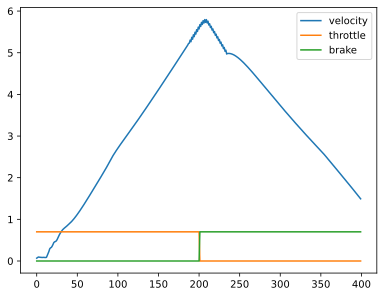

In [10]:
times = list(range(len(velocity)))

plt.plot(times, velocity, label="velocity")
plt.plot(times, throttle, label="throttle")
plt.plot(times, brake, label="brake")
plt.legend()

## have physical control

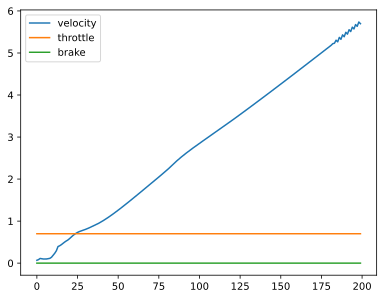

In [10]:
times = list(range(len(velocity)))

plt.plot(times, velocity, label="velocity")
plt.plot(times, throttle, label="throttle")
plt.plot(times, brake, label="brake")
plt.legend()

### without physical control

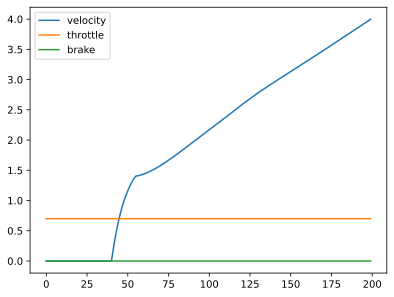

In [10]:
times = list(range(len(velocity)))

plt.plot(times, velocity, label="velocity")
plt.plot(times, throttle, label="throttle")
plt.plot(times, brake, label="brake")
plt.legend()

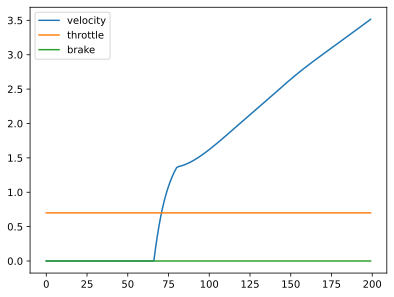

In [10]:
times = list(range(len(velocity)))

plt.plot(times, velocity, label="velocity")
plt.plot(times, throttle, label="throttle")
plt.plot(times, brake, label="brake")
plt.legend()